# LIBRARY YANG DIGUNAKAN

## Fungsi Library 
1. NumPy adalah library Python yang digunakan untuk bekerja dengan array
2. Pandas digunakan untuk menganalisis data
4. Scikit-learn dapat mengimplementasikan berbagai model pembelajaran mesin untuk regresi, klasifikasi, pengelompokan, dan alat statistik untuk menganalisisnya

In [1]:
import pandas as pd
import numpy as np

# METODE CRISP-DM

# - BUSSINESS UNDERSTANDING 

Tahapan ini bertujuan untuk memahami dan membantu masalah bidang bisnis terkait dengan "Peminjaman Dana (Loan)". Dengan program yang dihasilkan memiliki tujuan untuk membantu memberikan label kepada calon nasabah apakah layak mendapatkan pinjaman atau tidak, tentunya dengan menginputkan beberapa persyaratan yang telah di tentukan untuk mendukung keputusan terkait.

# - DATA UNDERSTANDING

Peminjaman Dana merupakan  suatu proses untuk membantu sebagian masyarakat yang membutuhkan untuk mencapai target tertentu atau memenuhi kebutuhannya. Namun dalam menentukan seseoarang layak mendapatkan pinjaman terdapat beberapa hal yang harus dijadikan sebagai data input sebagai acuan untuk mempertimbangkan keputusan. Data-data tersebut adalah sebagai berikut: 

1. Married (Status Penikahan)
2. Dependents (Tanggungan/Jumlah Anak)
3. Education (Status Pendidikan)
4. Self_Employed (Apakah nasabah seorang Wirausahawan)
5. ApplicantIncome (Pendapatan Calon Nasabah dalam Dollar)
6. CoApplicantIncome (Pendapatan Penjamin Calon Nasabah dalam Dollar)
7. Loan_Amount (Jumlah Pinjaman dalam Dollar)
8. Loan_Amount_Term (Total Cicilan Per-bulan)
9. Credit_History (Catatan Credit)
10. Property_Area (Area Tempat Tinggal)
11. Loan_Status (Status Pinjaman)
12. Loan_Id (Id Customer)
13. Gender (Jenis Kelamin)

# - DATA PREPARATION

A. Import Loan_Dataset dan Pengecekan kebenaran data
    
Dataset yang digunakan adalah dataset "Loan Eligible Dataset" diambil dari website kaggle.com yang dapat diakses dengan link : https://www.kaggle.com/datasets/vikasukani/loan-eligible-dataset. 

## Load Dataset

In [2]:
df = pd.read_csv('loan_dataset.csv')
df.sample(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
419,LP002347,Male,Yes,0,Graduate,No,3246,1417.0,138.0,360.0,1.0,Semiurban,Y
44,LP001136,Male,Yes,0,Not Graduate,Yes,4695,0.0,96.0,NaN,1.0,Urban,Y
237,LP001788,Female,No,0,Graduate,Yes,3463,0.0,122.0,360.0,NaN,Urban,Y
537,LP002738,Male,No,2,Graduate,No,3617,0.0,107.0,360.0,1.0,Semiurban,Y
567,LP002837,Male,Yes,3+,Graduate,No,3400,2500.0,123.0,360.0,0.0,Rural,N
211,LP001711,Male,Yes,3+,Graduate,No,3430,1250.0,128.0,360.0,0.0,Semiurban,N
246,LP001814,Male,Yes,2,Graduate,No,9703,0.0,112.0,360.0,1.0,Urban,Y
209,LP001702,Male,No,0,Graduate,No,3418,0.0,127.0,360.0,1.0,Semiurban,N
596,LP002941,Male,Yes,2,Not Graduate,Yes,6383,1000.0,187.0,360.0,1.0,Rural,N
372,LP002201,Male,Yes,2,Graduate,Yes,9323,7873.0,380.0,300.0,1.0,Rural,Y


In [3]:
#Menghapus kolom 'Loan_ID dan Gender'
#Karena tidak dibutuhkan dalam melakukan perhitungan 
df = df.drop(['Loan_ID', 'Gender'], axis=1)

In [4]:
df.sample(10)

,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
252,No,0,Not Graduate,Yes,2583,2167.0,104.0,360.0,1.0,Rural,Y
350,Yes,0,Graduate,No,9083,0.0,228.0,360.0,1.0,Semiurban,Y
440,No,0,Graduate,No,3660,5064.0,187.0,360.0,1.0,Semiurban,Y
220,Yes,0,Graduate,No,2221,0.0,60.0,360.0,0.0,Urban,N
289,No,0,Graduate,No,9508,0.0,187.0,360.0,1.0,Rural,Y
327,Yes,0,Graduate,Yes,5818,2160.0,184.0,360.0,1.0,Semiurban,Y
450,Yes,2,Not Graduate,No,2309,1255.0,125.0,360.0,0.0,Rural,N
424,Yes,0,Graduate,No,14880,0.0,96.0,360.0,1.0,Semiurban,Y
5,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
277,Yes,0,Graduate,No,3103,1300.0,80.0,360.0,1.0,Urban,Y


B. Memberlakukan data missing dan data inkonsistensi

In [9]:
df.info()
#Untuk melihat type data dari masing-masing columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Married            614 non-null    object 
 1   Dependents         614 non-null    object 
 2   Education          614 non-null    object 
 3   Self_Employed      614 non-null    object 
 4   ApplicantIncome    614 non-null    int64  
 5   CoapplicantIncome  614 non-null    float64
 6   LoanAmount         614 non-null    float64
 7   Loan_Amount_Term   614 non-null    float64
 8   Credit_History     614 non-null    float64
 9   Property_Area      614 non-null    object 
 10  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(6)
memory usage: 52.9+ KB


In [8]:
numerical = []
catgcols = []

for col in df.columns:
    if df[col].dtype=="float64":
        numerical.append(col)
    else:
        catgcols.append(col)

for col in df.columns:
    if col in numerical:
        df[col].fillna(df[col].median(), inplace=True)
    else:
        df[col].fillna(df[col].mode()[0], inplace=True)

In [7]:
numerical
#Atibut yang termasuk kedalam kategori Numerical

['CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']

In [8]:
catgcols
#Atibut yang termasuk kedalam kategori Alphabethical

['Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'ApplicantIncome',
 'Property_Area',
 'Loan_Status']

In [9]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [10]:
ind_col = [col for col in df.columns if col != 'Loan_Status']
dep_col = 'Loan_Status'

In [11]:
df[dep_col].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

## Transformasi Data
Pada tahap ini dilakukan transformasi yang awalnya alphabetical menjadi numerical

In [12]:
from sklearn.preprocessing import  LabelEncoder

le = LabelEncoder()

for col in catgcols:
    df[col] == le.fit_transform(df[col])

In [13]:
df['Married'] = le.fit_transform(df['Married'])
df['Dependents'] = le.fit_transform(df['Dependents'])
df['Education'] = le.fit_transform(df['Education'])
df['Self_Employed'] = le.fit_transform(df['Self_Employed'])
df['ApplicantIncome'] = le.fit_transform(df['ApplicantIncome'])
df['Property_Area'] = le.fit_transform(df['Property_Area'])
df['Loan_Status'] = le.fit_transform(df['Loan_Status'])

In [14]:
x = df[ind_col] #feature
y = df[dep_col] #label

In [15]:
df.head(10)

,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,0,0,376,0.0,128.0,360.0,1.0,2,1
1,1,1,0,0,306,1508.0,128.0,360.0,1.0,0,0
2,1,0,0,1,139,0.0,66.0,360.0,1.0,2,1
3,1,0,1,0,90,2358.0,120.0,360.0,1.0,2,1
4,0,0,0,0,381,0.0,141.0,360.0,1.0,2,1
5,1,2,0,1,353,4196.0,267.0,360.0,1.0,2,1
6,1,0,1,0,65,1516.0,95.0,360.0,1.0,2,1
7,1,3,0,0,146,2504.0,158.0,360.0,0.0,1,0
8,1,2,0,0,269,1526.0,168.0,360.0,1.0,2,1
9,1,1,0,0,470,10968.0,349.0,360.0,1.0,1,0


Menyimpan dataset yang sudah tertransformasi

In [16]:
df.to_csv('loan_dataset(clean).csv', index=False)
#Dataset terbaru yang dimana data nya sudah tertranformasi 

In [17]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)

# MODELING

## Membuat Model Decision Tree

In [18]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

dtc = DecisionTreeClassifier(
    ccp_alpha=0.0, class_weight=None, criterion='entropy',
    max_depth=4, max_features=None, max_leaf_nodes=None,
    min_impurity_decrease=0.0, min_samples_leaf=1,
    min_samples_split=2, min_weight_fraction_leaf=0.0,
    random_state=42, splitter='best'
)

model = dtc.fit(x_train, y_train)

dtc_acc = accuracy_score(y_test, dtc.predict(x_test))

print(f"akurasi data training = {accuracy_score(y_train, dtc.predict(x_train))}")
print(f"akurasi data testing = {dtc_acc} \n")

print(f"confusion matrix : \n{confusion_matrix(y_test, dtc.predict(x_test))}\n")
confusion = confusion_matrix(y_test, dtc.predict(x_test))
tn, fp, fn, tp = confusion.ravel()
print(f"classification report : \n {classification_report(y_test, dtc.predict(x_test))}")

akurasi data training = 0.8268839103869654
akurasi data testing = 0.8130081300813008 

confusion matrix : 
[[16 17]
 [ 6 84]]

classification report : 
               precision    recall  f1-score   support

           0       0.73      0.48      0.58        33
           1       0.83      0.93      0.88        90

    accuracy                           0.81       123
   macro avg       0.78      0.71      0.73       123
weighted avg       0.80      0.81      0.80       123



# Simulasi Model
Pada tahap ini dilakukan pengujian sederhana dengan menginputkan data-data yang terdapat pada dataset untuk melihat hasil akhir label

In [21]:
input_data = (0,2,0,0,240,2083.0,120.0,360.0,1.0,1)

input_data_as_numpy_array = np.array(input_data)

input_data_reshape = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshape)
print(prediction)

if (prediction[0] == 0):
    print ('Nasabah TIDAK mendapat pinjaman')
else: 
    print ('Nasabah mendapat pinjaman')

[1]
Nasabah mendapat pinjaman


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [22]:
input_data = (1,0,1,0,91,1911.0,116.0,360.0,0.0,1)

input_data_as_numpy_array = np.array(input_data)

input_data_reshape = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshape)
print(prediction)

if (prediction[0] == 0):
    print ('Nasabah TIDAK mendapat pinjaman')
else: 
    print ('Nasabah mendapat pinjaman')

[0]
Nasabah TIDAK mendapat pinjaman


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


# EVALUASI
## Visualisasi pohon keputusan

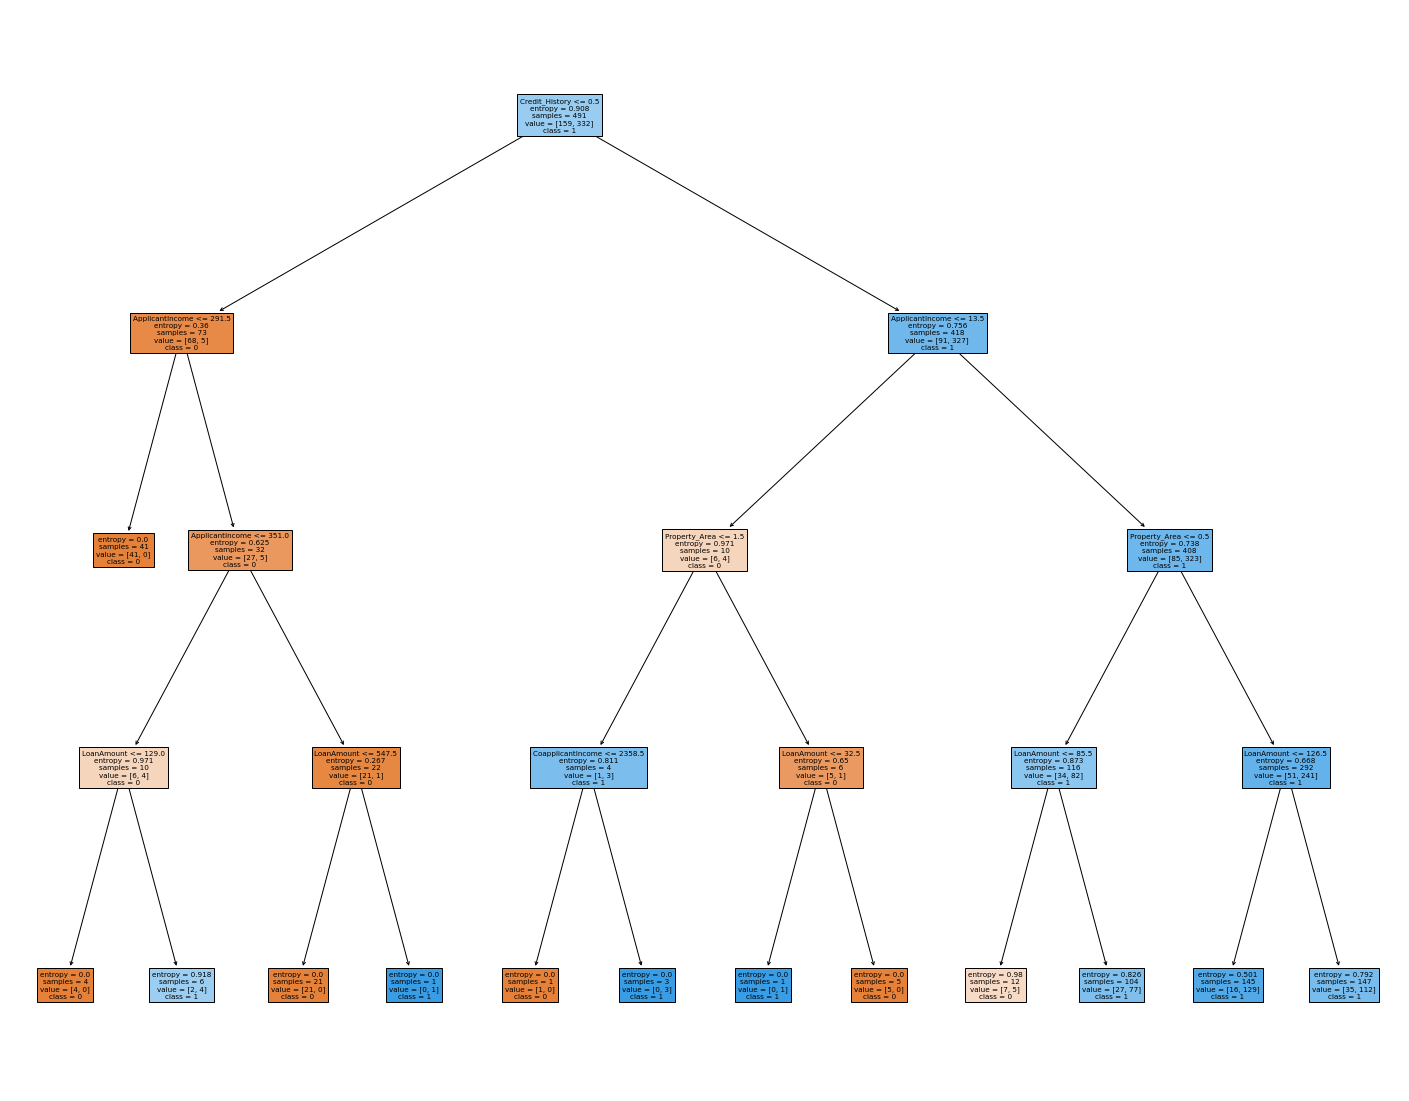

In [23]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(25,20))
fig = tree.plot_tree (model,
                        feature_names=ind_col,
                        class_names=['0','1'],
                        filled=True)